<a href="https://colab.research.google.com/github/pgbeermann2017/Bioinformatica/blob/master/ReadSpectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import pandas as pd
import Spectrum

# Nueva sección

# Nueva sección

In [0]:
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    #plt.text(ix,iy-0.1,int(ix),rotation=90)
    plt.annotate(int(ix), xy=(ix, iy), xytext=(ix+24, iy-0.2),arrowprops=dict(arrowstyle="->"),rotation=90)
    plt.savefig("spectrum.png")
    return [ix,iy]

In [0]:
def readFile(filename):
    f=open(filename,"r")
    data=f.read().split("\n")
    #print(data)
    i=0
    reading=False
    x=[]
    y=[]
    x1=0
    xmin=9E9
    deltaX=0
    factorX=1.0
    factorY=1.0
    units=False
    title="No especificado"
    Transm=True
    while len(data)>0:
        row=data.pop(0)
        if row=='##YUNITS=ABSORBANCE':
            Transm=False
        if row[0:9]=="##YFACTOR":
            factorY=float(row.split("=")[1])
        if row[0:7]=='##TITLE':
            title=row.split("=")[1]
        if row=='##XUNITS=MICROMETERS':
            factorX=1000
            units=True
        if row[0:5]=="##END":
            reading=False
        op=False
        if reading:
            p=row.split(" ")
            x0=float(p[0])
            y0=p[1:]
                       
            if x1>0:
                deltaX=float((x0-x1)/b1)               
                for s in y1:
                     if Transm==False:
                        s=s*factorY
                        s=10**(-s)
                    
                     y.append(float(s))
                     x.append(x0)
                     x0+=deltaX
            x1=x0
            y1=[float(x) for x in y0]
            b1=len(p)
            op=True
        if row[0:8]=="##XYDATA":
            reading=True
    x=np.array(x)
    y=np.array(y)
    p={'x':x,'y':y,'units':units,'title':title}
    return p

In [0]:
def plotSpectrum(filename):
    data=readFile(filename)
    x=data['x']
    y=data['y']
    units=data['units']
    title=data['title']
    if units:
        x=1/x*10000
    if x[0]<x[-1]:
        x=np.flip(x)
        y=np.flip(y)
   

    xmin=x.min()
    xmax=x.max()
    ymin=y.min()
    ymax=y.max()



    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(x,y,linewidth=1)
    ax.set_xlim(xmax,xmin)
    ax.xaxis.set_major_locator(MultipleLocator(500))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

    ax.xaxis.set_minor_locator(MultipleLocator(50))
    ax.grid(color='gray', linestyle='-', linewidth=1,alpha=0.8,which='major')
    ax.grid(color='gray', linestyle='-', linewidth=1,alpha=0.2,which='minor')
    #ax.text(xmax*0.98,0,title,fontsize=12)
    plt.title(title)
    x1=x[0]
    lastY=y[0]
    for i in range(1,len(y)-1,5):
        dx=x1-x[i]
        if np.abs(y[i]-lastY)<0.1:
            dy=0.1
        else:
            dy=0
        #if y[i-1]<y[i] and y[i+1]<y[i] and y[i]<0.6 and dx>20:
        if y[i-1]<y[i] and y[i+1]<y[i]:
            x1=x[i]
            #ax.text(x[i],y[i],int(x[i]),fontsize=12)
            
            #arrow=ax.annotate(int(x[i]), xy=(x[i], y[i]), xytext=(x[i]+15, y[i]-0.2),arrowprops=dict(arrowstyle="->"),rotation=90)
            
            lastY=y[i]
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()


<IPython.core.display.Javascript object>


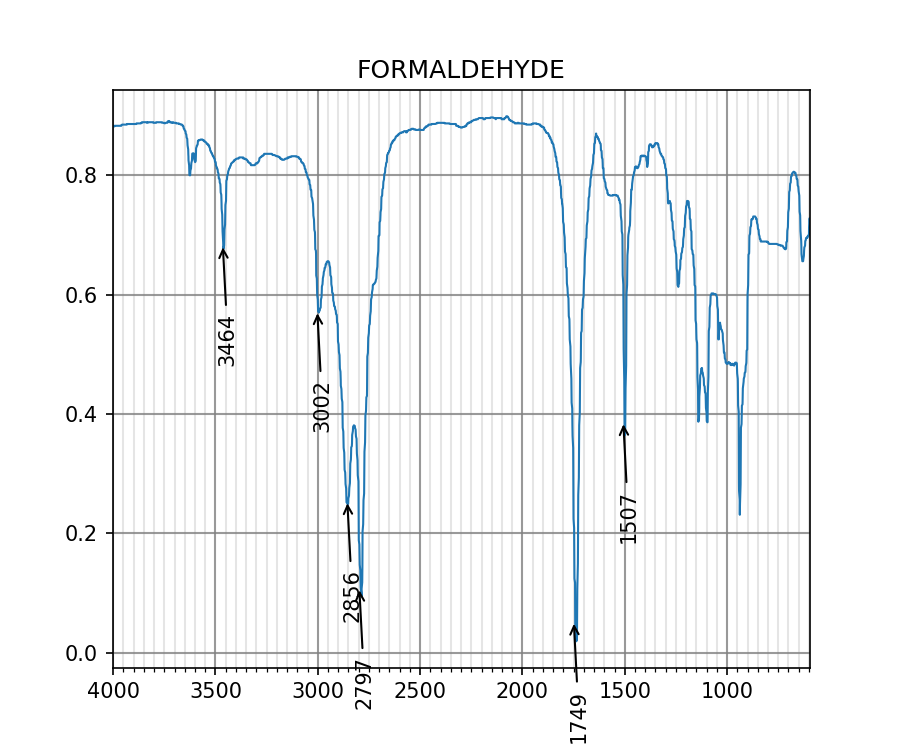

In [0]:
filename='C:\\Users\\pgbqu\\ANACONDA\\50-00-0-IR.jdx'
%matplotlib notebook

plotSpectrum(filename)

<IPython.core.display.Javascript object>


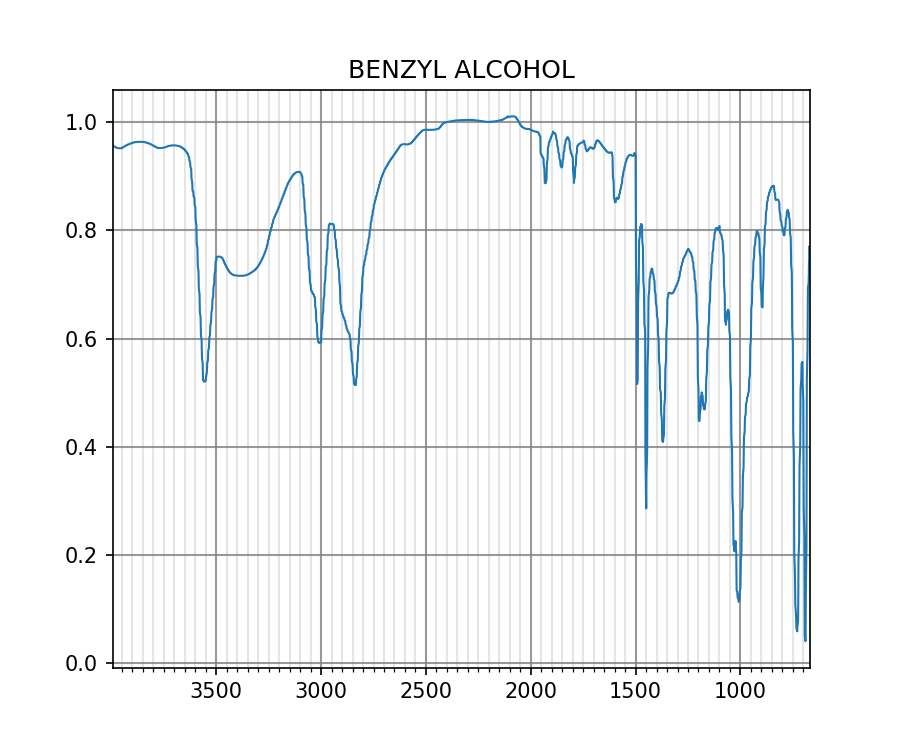

<IPython.core.display.Javascript object>


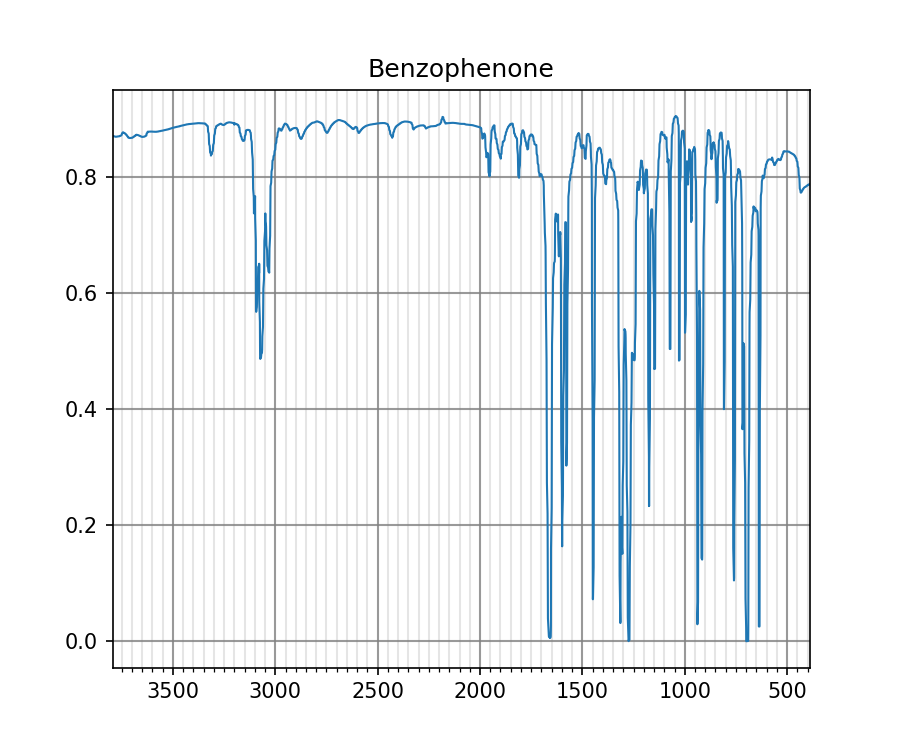

<IPython.core.display.Javascript object>


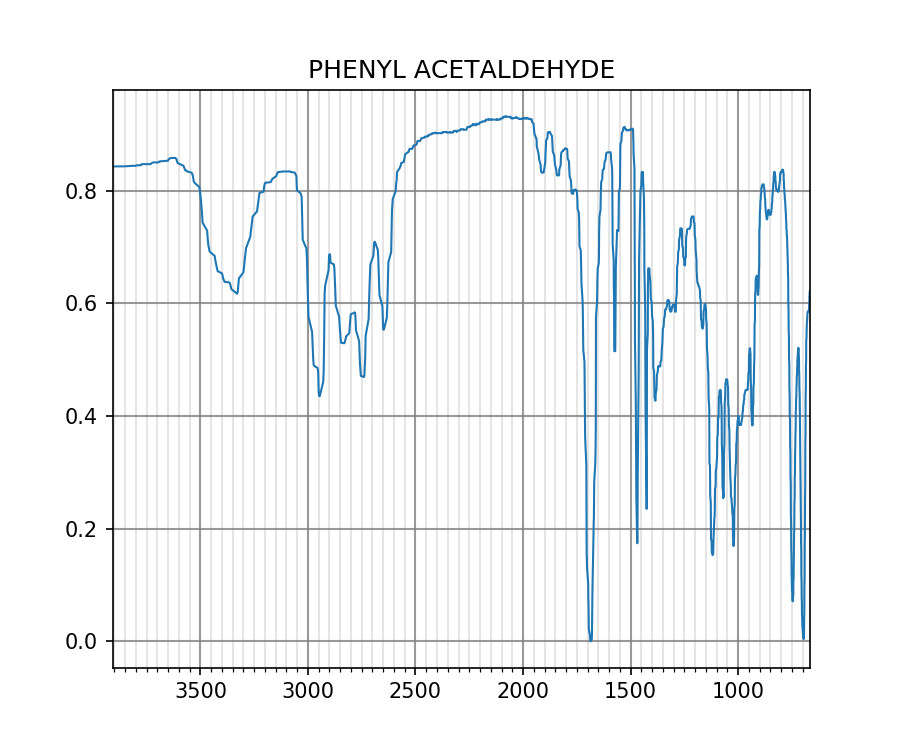

<IPython.core.display.Javascript object>


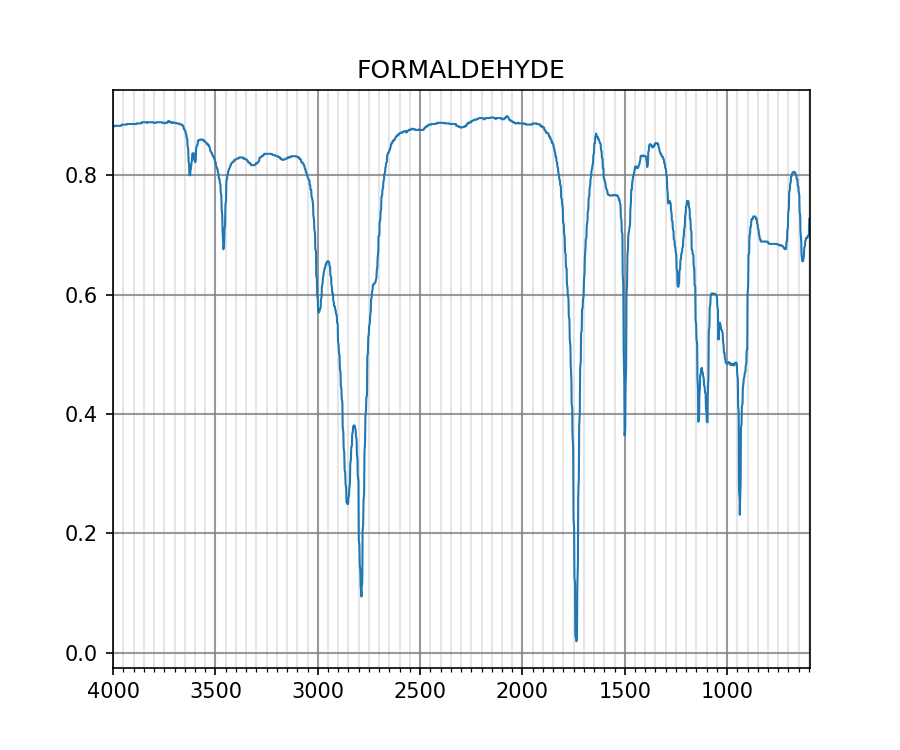

<IPython.core.display.Javascript object>


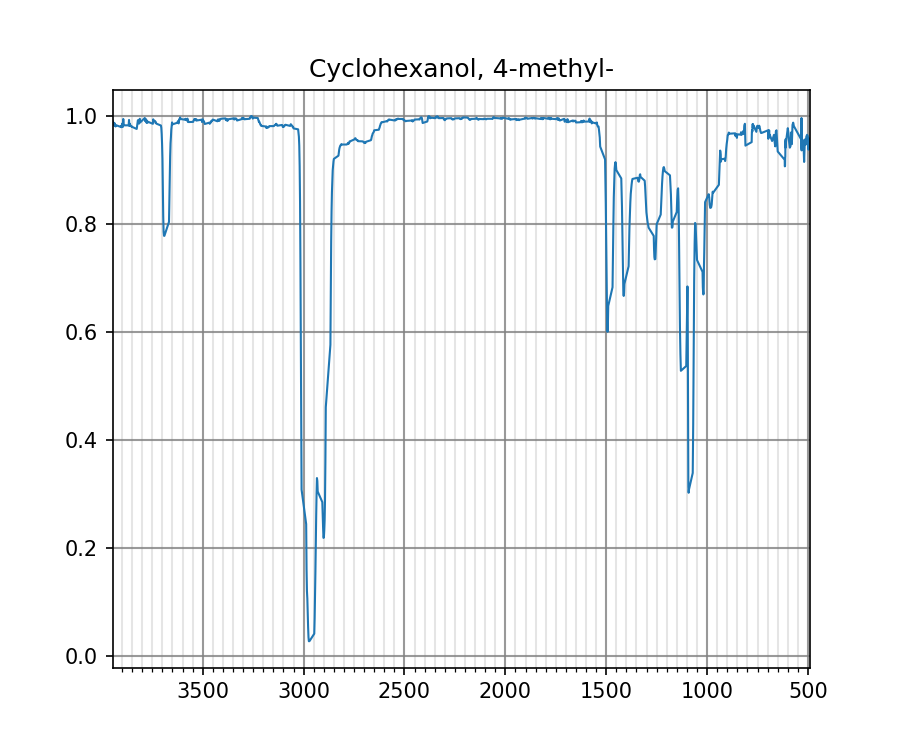

<IPython.core.display.Javascript object>


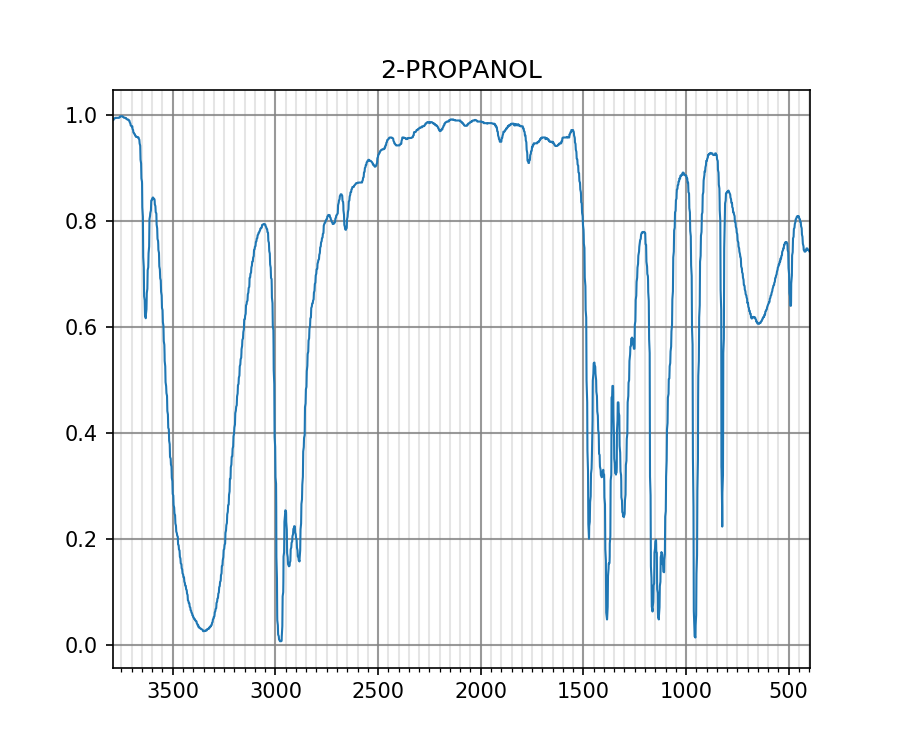

<IPython.core.display.Javascript object>


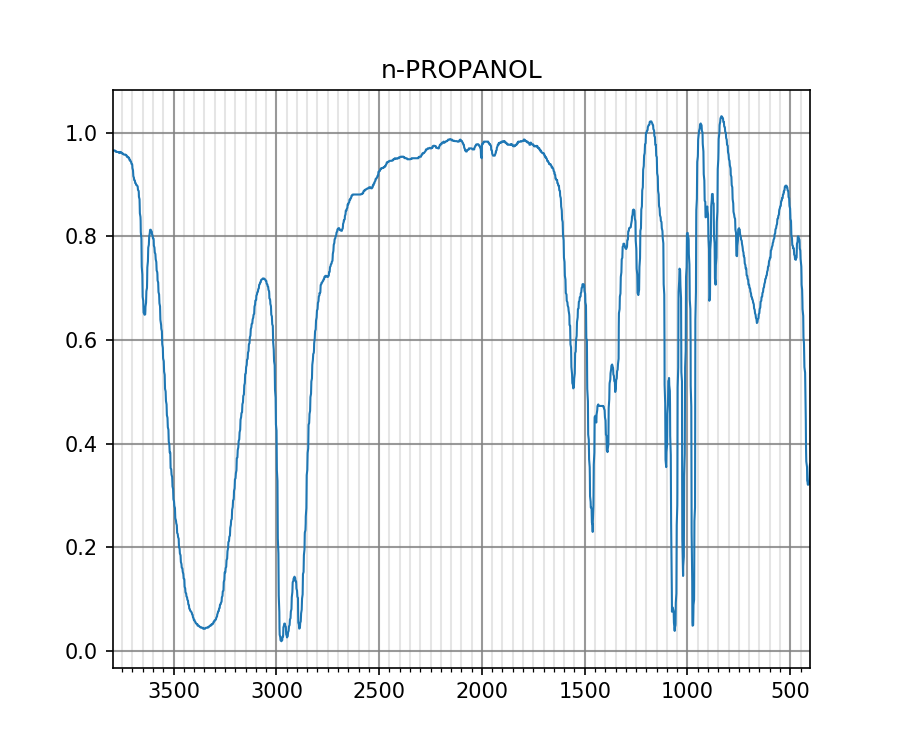

<IPython.core.display.Javascript object>


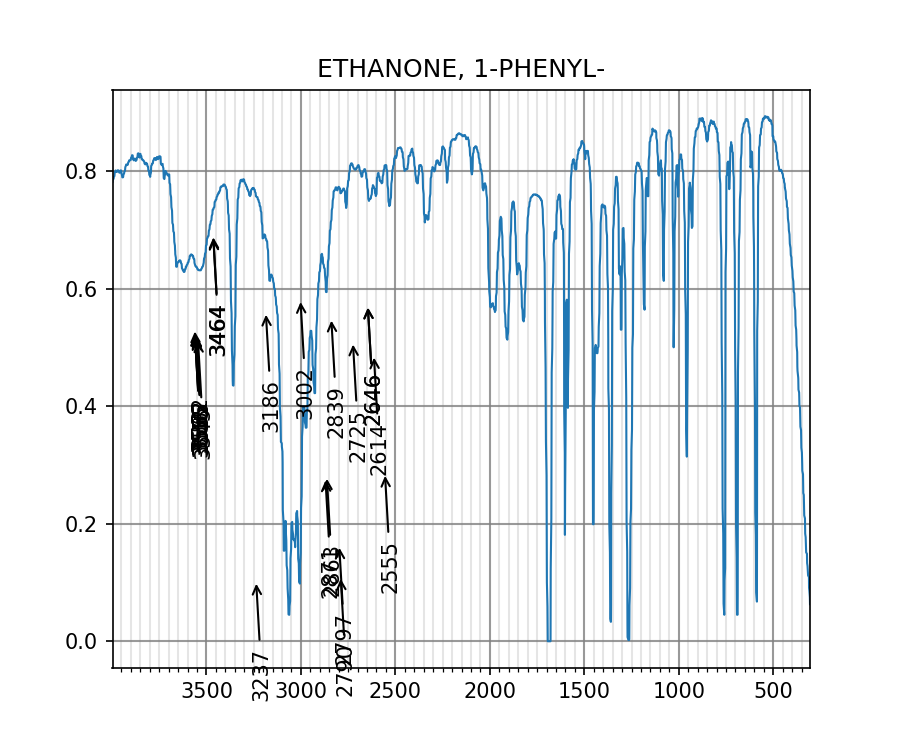

In [0]:
import os


path='C:\\Users\\pgbqu\\ANACONDA\\'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jdx' in file:
            files.append(os.path.join(r, file))

for f in files:
    filename=f.split("\\")[-1]
    plotSpectrum(filename)